# Section 1.2 Introduction to Model Fitting

In [1]:
import pymc3 as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [2]:
az.style.use('arviz-white')

## Activity: Estimate the Proportion of Water

Now it's your turn to work through an example inspired from Richard McElreath's excellent book [Statistical Rethinking](https://www.amazon.com/Statistical-Rethinking-Bayesian-Examples-Chapman/dp/1482253445/)

### How much of a planet is covered in water?

Good news: you're an astronomer that just discovered a new planet. Bad news: your telescope has a small field of view and you can only see one tiny point on the planet at a time. More bad news: you're also a starving grad student and you can only take 5 measurements on your monthly stipend. 

**How much of the planet is covered in water?**


You are trying to estimate $\theta$ where
$$\theta = \text{Proportion of water on the planet}$$

Your model is formulated as follows

$$ 
\theta \sim \operatorname{Uniform}(0,1) \\
p_{\text{water}} \sim \operatorname{Binom}(\theta)
$$

(Extra credit: the probability density function for $\operatorname{Uniform}(0, 1)$ is the same as for $\operatorname{Beta}(1, 1)$)

### Exercise 1
* What is the prior in this model?

*Type your answer here*

### Exercise 2
* What is the likelihood in the model?

*Type your answer here*

### Exercise 3
Using the data provided below fit your model to estimate the proportion of water on the planet using PyStan or PyMC3

*Hint:*
In the solutions we have provided models for you.

In [3]:
# A value of 0 signifies a land observation, a value of 1 signifies a water observation
observations = [0, 0, 1, 0, 1]
water_observations = sum(observations)
total_observations = len(observations)

In [4]:
with pm.Model() as planet_model:
    p_water = pm.Uniform("p", 0 ,1)
    w = pm.Binomial("w", p=p_water, n=total_observations, observed=water_observations)
    trace = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:02<00:00, 4279.51draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb92714ef0>],
      dtype=object)

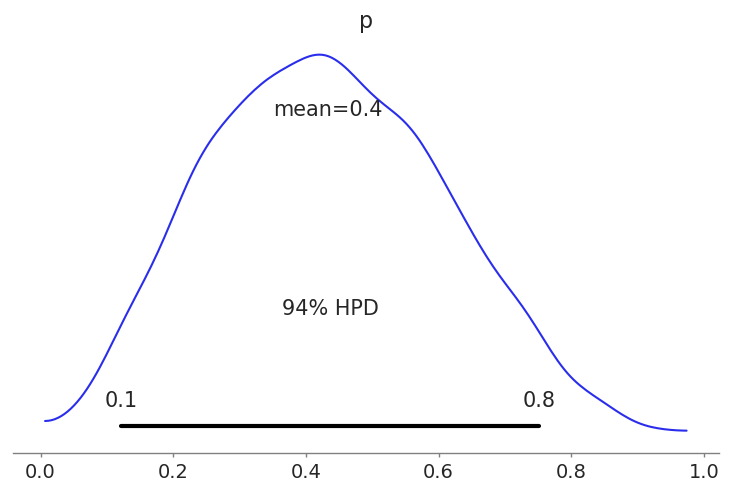

In [5]:
az.plot_posterior(trace)

### Activity 4: Try out a couple ArviZ functions

Convert your inference data to `az.InferenceData` using the methods `az.from_pymc3` or `az.from_stan`. Then try a couple plots such as 

* az.plot_trace
* az.plot_forest
* az.plot_autocorr

Try running a summary function such as 

* az.summary

For now don't worry too much about how to interpret these plots and statistics. This will be covered as we continue in the tutorial.

In [6]:
# Convert PPL data to az.InferenceData
inference_data = az.from_pymc3(trace)

In [7]:
az.summary(inference_data)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.433,0.174,0.122,0.752,0.003,0.002,4156.0,4156.0,4227.0,6295.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb900f0fd0>,
      dtype=object)

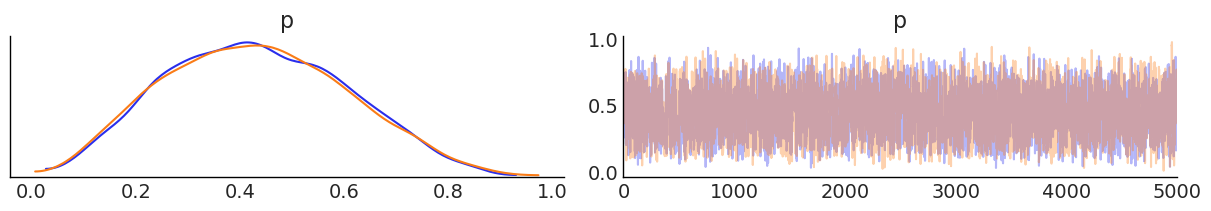

In [8]:
az.plot_trace(inference_data)

(<Figure size 600x420 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb9002fc50>],
       dtype=object))

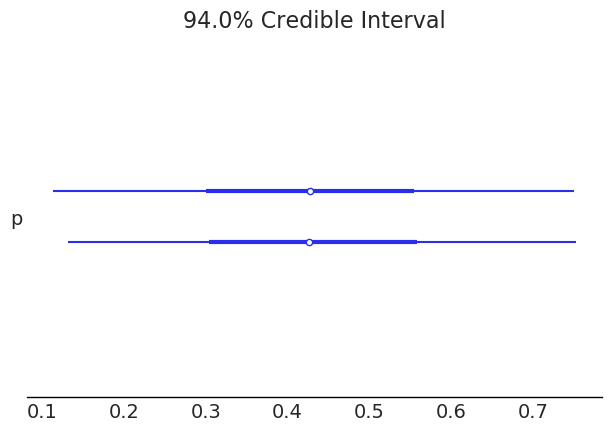

In [9]:
az.plot_forest(inference_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb830853c8>,
      dtype=object)

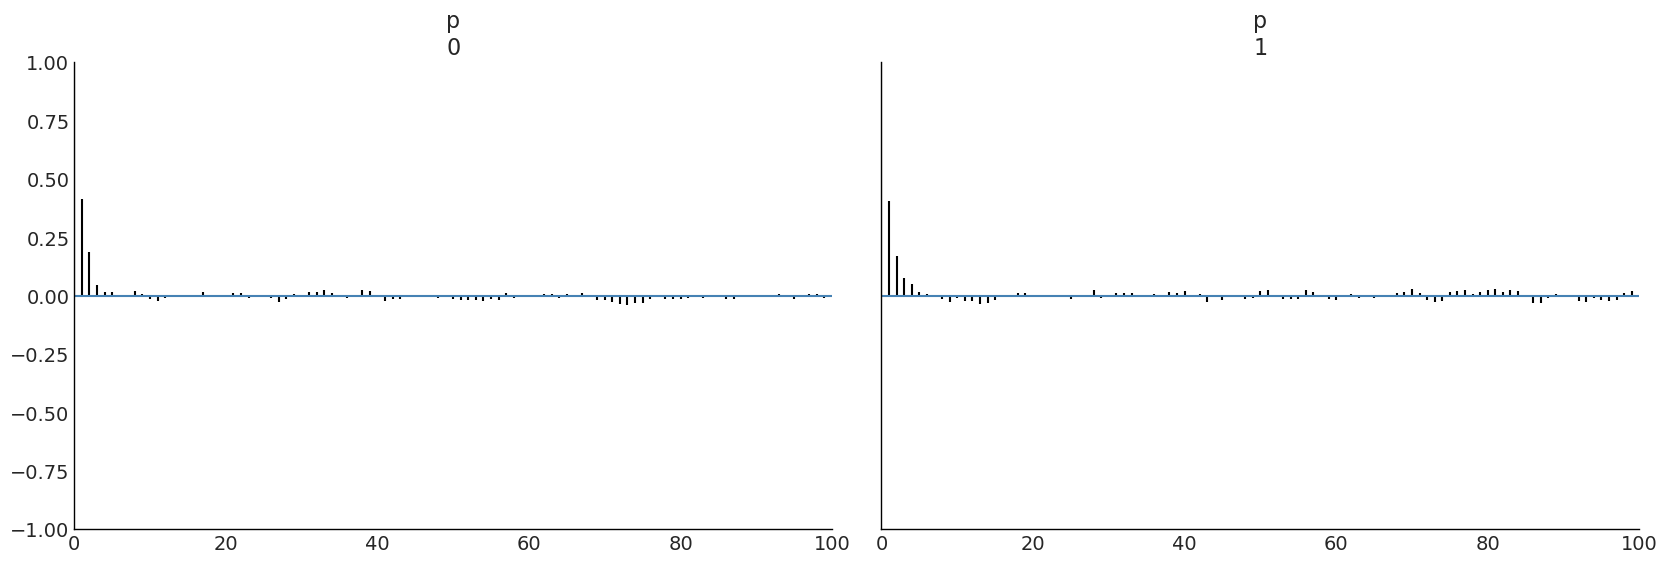

In [10]:
az.plot_autocorr(inference_data)

### Bonus Activities
 * Modify your observations. Add more and see how the plots change
     * Tip: Quickly increase the number of observations with np.repeat or with in lists with * operator as follows `[0,1]*100`